In [41]:
import numpy as np
import sklearn
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from math import sqrt
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
pd.set_option('display.max_rows', 20000)
pd.set_option('display.max_columns', 20000)
pd.set_option('display.max_colwidth', -1)
from osgeo import gdal
from gdalconst import *
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotnine as p9

In [2]:
X,Y,Z = datasets.make_blobs(cluster_std=3,random_state=20,n_samples=500,centers=2, n_features = 1, return_centers = True)
#X = np.dot(X, np.random.RandomState(0).randn(2,2))

#X = 16*np.random.randn(500,1)+3
 
GMM = GaussianMixture(n_components=2)
GMM.fit(X)
#Y = np.random.randint(-10, 20, size=(1, 2))
#print(GMM.means_, GMM.predict_proba(Y))
print(GMM.means_)
print(sqrt(GMM.covariances_[0]),sqrt(GMM.covariances_[1]))
#print (Z)

GaussianMixture(n_components=2)

[[7.57338132]
 [1.76215472]]
3.0840577915488887 3.2143494563639874


In [3]:
X.shape

(500, 1)

In [4]:
np.random.randn(500).shape

(500,)

In [5]:
X,Y,Z = sklearn.datasets.make_blobs(cluster_std=3,random_state=20,n_samples=500,centers=2, n_features = 1, return_centers = True)
 
GMM = GaussianMixture(n_components=2)
GMM.fit(X)

print(GMM.means_)
print(sqrt(GMM.covariances_[0]),sqrt(GMM.covariances_[1]))


GaussianMixture(n_components=2)

[[7.57338132]
 [1.76215472]]
3.0840577915488887 3.2143494563639874


# HISTOGRAMA DE LOS QUE SACAMOS NOSOTROS CON VERA

In [6]:
df = pd.read_csv("/home/manuela/Escritorio/inundaciones.csv")

In [7]:
g = np.zeros(len(df.Anio))
df['Dia'] = df['Dia'].astype(str)

for i in range(len(df.Anio)):
    g[i] = str(df.Anio[i]) + str(df.Dia[i].zfill(3))
    
g = g.astype(np.int)

In [8]:
df["fecha"] = g

In [9]:
df.head()

,Unnamed: 0,Latitud,Longitud,Maps,Html,Referencia,Departamento,Provincia,Dia,Anio,fecha
0,NaN,"-31,528142","-61,807861",campo,NaN,Estación Clucellas,Castellanos,Santa Fé,1,2017,2017001
1,NaN,"-31,709009","-61,963226",dudoso,NaN,Sastre,San Martín,Santa Fé,1,2017,2017001
2,NaN,"-31,224912","-61,794174",campo,NaN,NaN,NaN,NaN,1,2017,2017001
3,NaN,"-31,003199","-61,886937",campo,NaN,NaN,NaN,NaN,1,2017,2017001
4,NaN,"-34,638248","-63,020336",campo raro,NaN,NaN,NaN,NaN,1,2017,2017001


In [10]:
df = df.replace(2019052 , 2019049)

In [11]:
for r in range(len(df.fecha)):
    df.Longitud[r] = df.Longitud[r].replace(",",".")
    df.Latitud[r] = df.Latitud[r].replace(",",".")

In [12]:
df["Longitud"] = df.Longitud.astype(float)
df["Latitud"] = df.Latitud.astype(float)

In [13]:
def pixelado (archivo_tif,longitud,latitud, k):
    #xOrigin = transform[0], yOrigin = transform[3], pixelWidth = transform[1], pixelHeight = -transform[5] 
    transform = in_ds.GetGeoTransform()
    in_band = archivo_tif.GetRasterBand(1)
    in_data = in_band.ReadAsArray(0, 0, archivo_tif.RasterXSize, archivo_tif.RasterYSize)

    col = int((longitud - transform[0]) / transform[1])
    row = int((latitud - transform[3]) / transform[5])
    
    arreglo = []
    for i in range(-k,k+1):
        for j in range(-k,k+1):
            arreglo.append(in_data[row+i][col+j])
    arreglo = np.array(arreglo)
    return arreglo

In [14]:
lista_indices = []

for i in range(len(df.fecha)):
    in_ds = gdal.Open("/home/manuela/sancor/imagenes/mndwi/mndwi_" + str(df.fecha[i]) + "_500m.tif")
    p = pixelado(in_ds, df.Longitud[i], df.Latitud[i], 0)
    lista_indices.append(p)

In [15]:
df["mndwi"] = lista_indices

In [16]:
df["mndwi"] = df.mndwi.astype(float)

<Figure size 720x432 with 0 Axes>

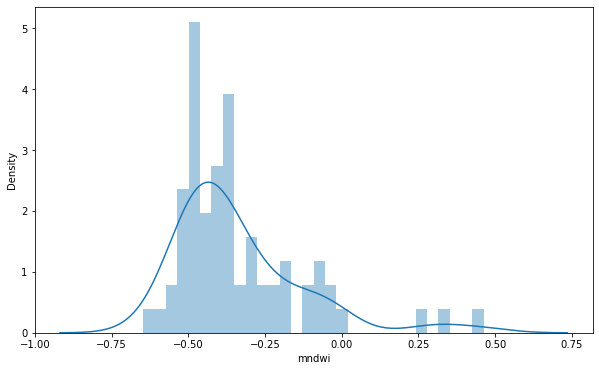

In [36]:
plt.figure(figsize=(10,6))
sns.distplot(df.mndwi, bins = 30)

In [19]:
df.fecha.unique()

array([2017001, 2017017, 2017033, 2017049, 2019033, 2019049, 2016337])

In [31]:
df[df.mndwi < -0.6]

,Unnamed: 0,Latitud,Longitud,Maps,Html,Referencia,Departamento,Provincia,Dia,Anio,fecha,mndwi
35,NaN,-34.765429,-63.809005,semirecurrente,cerca de inundaciones,Italo,Gral Roca,Córdoba,33,2019,2019033,-0.646154


In [33]:
df_nuevo = df.drop(35,axis=0)

<Figure size 720x432 with 0 Axes>

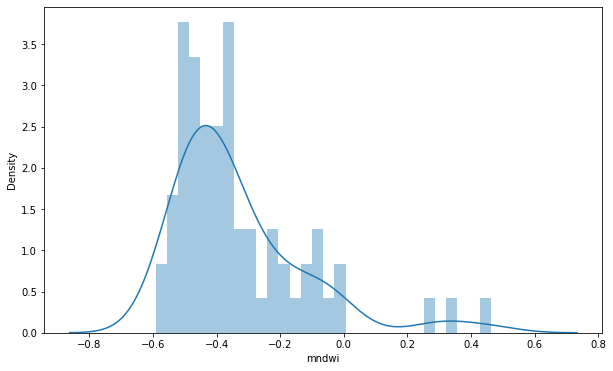

In [35]:
plt.figure(figsize=(10,6))
sns.distplot(df_nuevo.mndwi, bins = 30)

# HISTOGRAMA DIEGO

In [93]:
df_diego = pd.read_csv("/home/manuela/sancor/CSV/diego_nuevo.csv")

In [94]:
len(df_diego.id)

49248

In [95]:
lista_indices_diego = []
in_ds = gdal.Open("/home/manuela/sancor/imagenes/ndwi/ndwi_2016073_500m.tif")

for i in range(len(df_diego.id)):
    p = pixelado(in_ds, df_diego.Longitud[i], df_diego.Latitud[i], 0)
    lista_indices_diego.append(p)

In [96]:
df_diego["ndwi_modis"] = lista_indices_diego

In [97]:
df_diego["ndwi_modis"] = df_diego.ndwi_modis.astype(float)

In [98]:
#df_diego["ndwi_sentinel"] = df_diego.ndwi_sentinel/1000

<Figure size 720x432 with 0 Axes>

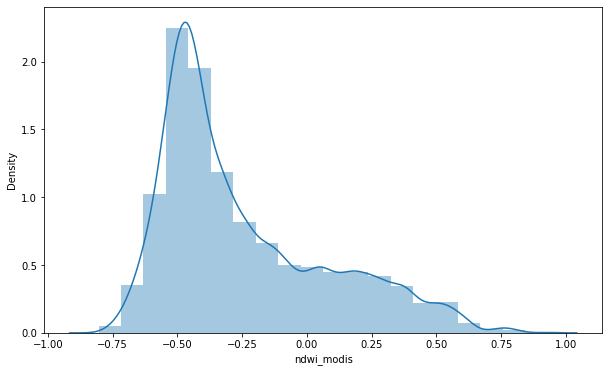

In [99]:
plt.figure(figsize=(10,6))
sns.distplot(df_diego.ndwi_modis, bins = 20)

In [100]:
pd.DataFrame(df_diego).to_csv("/home/manuela/sancor/CSV/diego_nuevo.csv")

<Figure size 720x432 with 0 Axes>

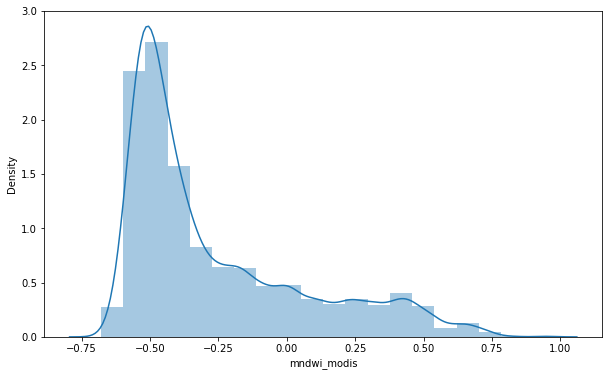

In [101]:
plt.figure(figsize=(10,6))
sns.distplot(df_diego.mndwi_modis, bins = 20)

<Figure size 720x432 with 0 Axes>

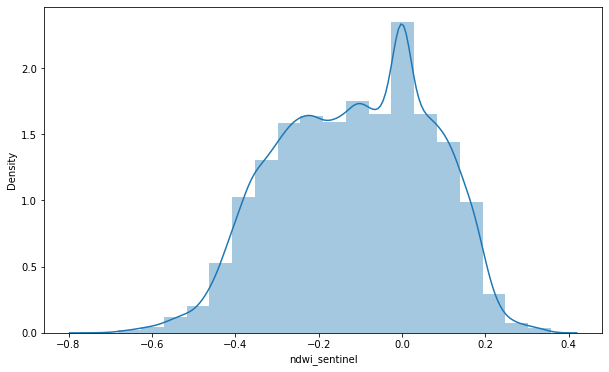

In [102]:
plt.figure(figsize=(10,6))
sns.distplot(df_diego.ndwi_sentinel, bins = 20)